In [3]:
import geopandas as gpd
import numpy as np

In [4]:
import fiona

layers = fiona.listlayers(r'D:\CADT\kontur_population_20231101.gpkg\population_clip_cambodia.gpkg')
print(layers)

['population_clip_cambodia']


In [5]:
kontur = gpd.read_file("D:\CADT\kontur_population_20231101.gpkg\population_clip_cambodia.gpkg", layer='population_clip_cambodia')

In [6]:
print(kontur.head())
print(kontur.columns)
print(kontur.crs)

                h3  population  \
0  886936db6dfffff         4.0   
1  886936db67fffff         9.0   
2  886936db65fffff         9.0   
3  886936db63fffff        23.0   
4  886936db61fffff         9.0   

                                            geometry  
0  MULTIPOLYGON (((107.3491 13.7821, 107.34966 13...  
1  MULTIPOLYGON (((107.3617 13.77282, 107.36227 1...  
2  MULTIPOLYGON (((107.35273 13.7739, 107.3533 13...  
3  MULTIPOLYGON (((107.36703 13.77994, 107.3676 1...  
4  MULTIPOLYGON (((107.35807 13.78102, 107.35863 ...  
Index(['h3', 'population', 'geometry'], dtype='object')
EPSG:4326


In [7]:
total_population = kontur['population'].sum()
print(f"Total population in Cambodia (Kontur): {total_population:,.0f}")


Total population in Cambodia (Kontur): 17,028,918


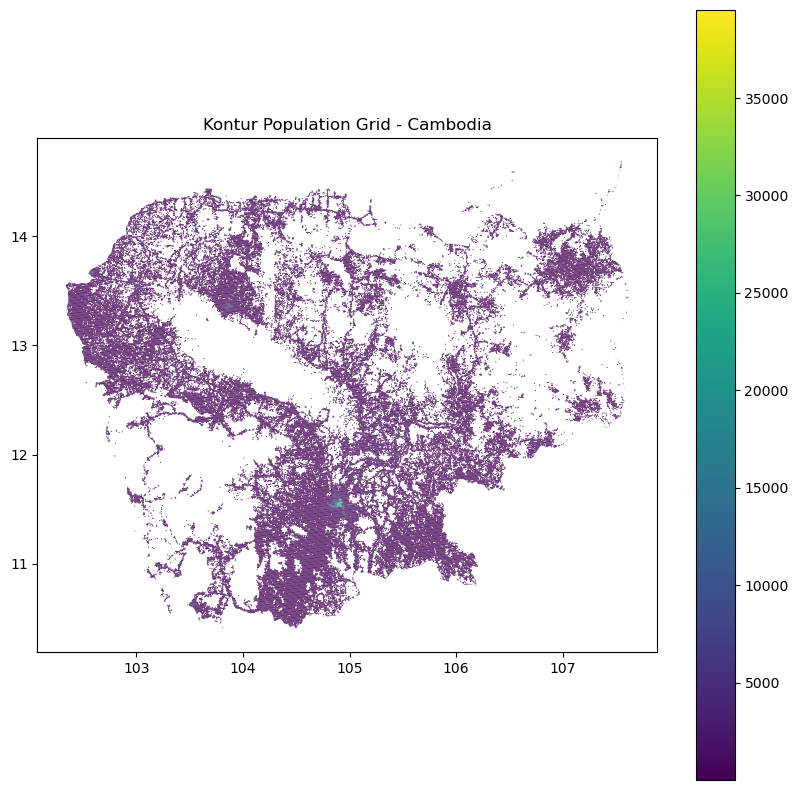

In [8]:
import matplotlib.pyplot as plt
kontur.plot(column='population', cmap='viridis', legend=True, figsize=(10, 10))
plt.title('Kontur Population Grid - Cambodia')
plt.show()

In [9]:
communes = gpd.read_file(r'D:\CADT\kontur_population_20231101.gpkg\CambodiaCommune_Fixed.gpkg')

In [10]:
communes.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM3_EN', 'ADM3_PCODE', 'ADM3_REF',
       'ADM3ALT1EN', 'ADM3ALT2EN', 'ADM2_EN', 'ADM2_PCODE', 'ADM1_EN',
       'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'geometry'],
      dtype='object')

In [11]:
communes

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,geometry
0,1.208473,0.054496,A Buon Leu,KH110202,None,None,None,Kaoh Nheaek,KH1102,Mondul Kiri,KH11,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((107.3385 13.3161, 107.34027 13..."
1,0.094650,0.000522,Achar Leak,KH060309,None,None,None,Stueng Saen,KH0603,Kampong Thom,KH06,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.91931 12.73907, 104.91791 ..."
2,0.213799,0.001984,Aekakpheap,KH160603,None,None,None,Ou Chum,KH1606,Ratanak Kiri,KH16,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((107.13708 13.77472, 107.14008 ..."
3,0.342817,0.005563,Akphivoadth,KH040801,None,None,None,Tuek Phos,KH0408,Kampong Chhnang,KH04,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.62549 12.05133, 104.62292 ..."
4,0.159472,0.001303,Akreiy Ksatr,KH080601,None,None,None,Lvea Aem,KH0806,Kandal,KH08,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.98389 11.57971, 104.9837 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,0.576982,0.012531,Yea Angk,KH050808,None,None,None,Thpong,KH0508,Kampong Speu,KH05,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.46411 11.67212, 104.49152 ..."
1629,0.319886,0.004781,Yeak Laom,KH160203,None,None,None,Ban Lung,KH1602,Ratanak Kiri,KH16,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((107.05652 13.74591, 107.0603 1..."
1630,1.191453,0.056864,Yeang,KH130305,None,None,None,Choam Ksant,KH1303,Preah Vihear,KH13,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.80212 14.04828, 104.80011 ..."
1631,0.232062,0.003658,Yeang,KH170716,None,None,None,Puok,KH1707,Siemreap,KH17,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((103.65771 13.59448, 103.65747 ..."


In [12]:
phnom_penh_communes = communes[communes['ADM1_EN'].str.lower().str.contains('phnom penh')]

In [13]:
# Ensure CRS matches
kontur = kontur.to_crs(phnom_penh_communes.crs)

In [14]:
# Spatial join: keep only population data within Phnom Penh communes
kontur_pp = gpd.sjoin(kontur, phnom_penh_communes, how='inner', predicate='intersects')

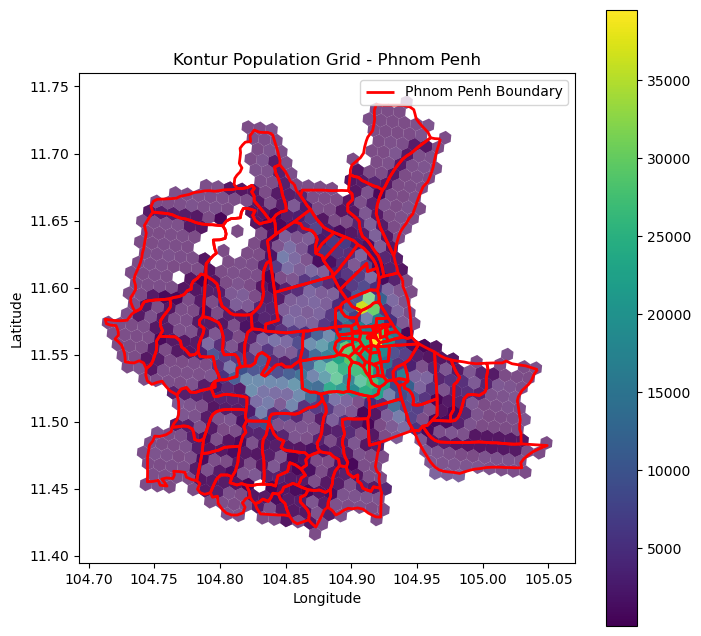

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
phnom_penh_communes.boundary.plot(ax=ax, color='red', linewidth=2, label='Phnom Penh Boundary')
kontur_pp.plot(ax=ax, column='population', cmap='viridis', legend=True, markersize=1, alpha=0.7)
plt.title('Kontur Population Grid - Phnom Penh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [16]:
# kontur_pp.to_csv('../../../data/raw/population_phnom_penh.csv', index=False)

In [17]:
kontur_pp['geometry'].head()

38862    MULTIPOLYGON (((104.97555 11.70869, 104.97609 ...
38868    MULTIPOLYGON (((104.95959 11.68686, 104.96012 ...
38869    MULTIPOLYGON (((104.94522 11.68054, 104.94576 ...
38870    MULTIPOLYGON (((104.95427 11.67958, 104.9548 1...
38871    MULTIPOLYGON (((104.94682 11.69604, 104.94735 ...
Name: geometry, dtype: geometry

In [19]:
import pandas as pd

df_realestate = pd.read_csv('../../../data/processed/realestates_kh_v2_3_7.csv', encoding='latin1')

In [20]:
gdf_realestate = gpd.GeoDataFrame(
    df_realestate,
    geometry=gpd.points_from_xy(df_realestate.longitude, df_realestate.latitude),
    crs='EPSG:4326'
)

In [21]:
# If kontur_pp is your population hexagons GeoDataFrame
kontur_pp = kontur_pp.to_crs(gdf_realestate.crs)

In [22]:
# Only keep the population column and geometry from kontur_pp
gdf_population = kontur_pp[['population', 'geometry']]

# Spatial join: each point gets the population of the hex it falls in
gdf_joined = gpd.sjoin(gdf_realestate, gdf_population, how='left', predicate='within')

In [23]:
gdf_joined.head()

,id,price_display,bedrooms,bathrooms,land_area,address_subdivision,address_locality,address_line_2,category_name,is_parent,type,latitude,longitude,geometry,index_right,population
0,235560.0,114000.0,4.0,5.0,71.4,Phnom Penh,Chroy Changvar,Preaek Lieb,Unit,False,residential,11.589674,104.925654,POINT (104.92565 11.58967),54162.0,11327.0
0,235560.0,114000.0,4.0,5.0,71.4,Phnom Penh,Chroy Changvar,Preaek Lieb,Unit,False,residential,11.589674,104.925654,POINT (104.92565 11.58967),54162.0,11327.0
0,235560.0,114000.0,4.0,5.0,71.4,Phnom Penh,Chroy Changvar,Preaek Lieb,Unit,False,residential,11.589674,104.925654,POINT (104.92565 11.58967),54162.0,11327.0
1,248374.0,188343000.0,NaN,NaN,104635.0,Phnom Penh,Russey Keo,Tuol Sangkae 1,Land/Development,False,residential,11.587810,104.902234,POINT (104.90223 11.58781),54093.0,8037.0
1,248374.0,188343000.0,NaN,NaN,104635.0,Phnom Penh,Russey Keo,Tuol Sangkae 1,Land/Development,False,residential,11.587810,104.902234,POINT (104.90223 11.58781),54093.0,8037.0


In [24]:
gdf_joined.to_csv('../../../data/processed/realestates_kh_v3.csv', index=False, encoding='latin1')